# Financial Data Analysis - Logistic Regression

### *Importing Libraries*

In [1]:
import pandas as pd #used for loading the dataset
import numpy as np #to perform array
import matplotlib.pyplot as plt

### *Choose Dataset file from Local Directory*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FinalTeamProjectDataset.xlsx to FinalTeamProjectDataset.xlsx


### *Load Dataset*

In [3]:
dataset = pd.read_excel('FinalTeamProjectDataset.xlsx')

### *Summarize Dataset*

In [4]:
print(dataset.shape)
print('\n')
print("************************ Descriptive Data *************************")
print('\n')
print(dataset.describe())
print('\n')
print("************************ First 5 Rows *************************")
print('\n')
print(dataset.head(5))

(1577, 34)


************************ Descriptive Data *************************


             MScore  Return on Assets  Current Ratio  Quick Ratio  \
count  1.577000e+03       1577.000000    1577.000000  1577.000000   
mean  -1.414194e+03        -17.218083       3.426707     3.003912   
std    7.532558e+04        679.562446      15.531591    15.456376   
min   -2.893110e+06     -26985.844665       0.046152    -0.563750   
25%   -3.573374e+00         -0.011462       1.066572     0.794059   
50%   -3.297539e+00          0.034867       1.598968     1.227203   
75%   -2.990423e+00          0.075620       2.535613     2.008951   
max    7.312098e+05         40.606679     335.646478   335.646478   

       Accounts Receivable Turnover  Accounts Payable Turnover  \
count                  1.577000e+03                1577.000000   
mean                   1.094914e+05                  39.707032   
std                    4.344398e+06                  55.454141   
min                   -4.263865

### *Data Visualisation*

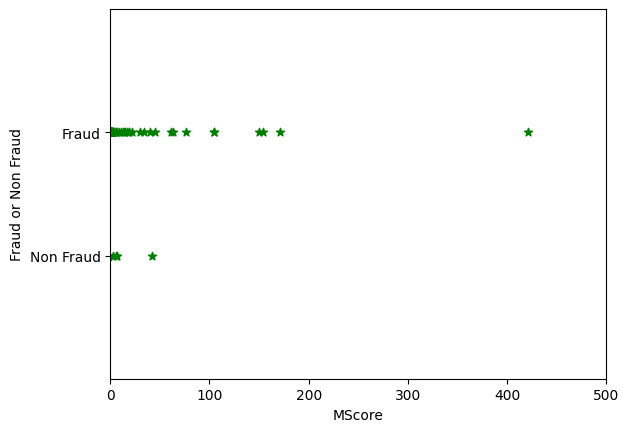

In [5]:
plt.xlabel('MScore')
plt.ylabel('Fraud or Non Fraud')
plt.xlim(0, 500)
plt.ylim(-1, 2)
Fraud_NonFraud = dataset['Fraud or Non Fraud']
plt.scatter(dataset.MScore,Fraud_NonFraud,color='green',marker='*')


### *Segregate Dataset into X(Input/IndependentVariable)*




In [6]:
X = dataset[['MScore']]
X

,MScore
0,-2.389523
1,-3.305048
2,-3.262427
3,-3.321651
4,-3.039177
...,...
1572,-3.390463
1573,-4.349820
1574,-3.201397
1575,-1.200401


### *Segregate Dataset into Y(Output/DependentVariable) & Converting Categorical value into numerical value- 0 and 1*

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Fraud or Non Fraud'] = label_encoder.fit_transform(dataset['Fraud or Non Fraud'])
# 1 - Non Fraud
# 0 - Fraud
Y = dataset[['Fraud or Non Fraud']]
Y

,Fraud or Non Fraud
0,1
1,1
2,1
3,1
4,1
...,...
1572,1
1573,1
1574,1
1575,0


### *Identifying Outliers*

In [8]:
from scipy import stats
z_scores = np.abs(stats.zscore(X))
z_scores

# Setting a threshold for identifying outliers
positive_threshold = 0.1
negative_threshold = -0.1

# Storing in outlier variable
outliers = np.where((z_scores < negative_threshold) | (z_scores > positive_threshold))
outliers

(array([ 158,  296,  962, 1265, 1455]), array([0, 0, 0, 0, 0]))

### *Replacing Outliers with Mean Value for MScore(Independent Value)*

In [9]:
# Calculate mean for each column
column_means = np.mean(X, axis=0)
column_means

dataset.loc[outliers[0], 'MScore'] = dataset['MScore'].mean()
dataset


,Companies,MScore,Fraud or Non Fraud,Return on Assets,Current Ratio,Quick Ratio,Accounts Receivable Turnover,Accounts Payable Turnover,Asset Turnover,Gross Profit Margin,...,Accounts receivable,Accounts payable,EBITDA,Rating,R_Score,Enterprise Value,MarketCap,Rev_Growth,NI_Growth,Debt Growth
0,XOM,-2.389523,1,0.067980,1.044330,0.712780,42.718239,35.119899,0.816386,23.450624,...,3.238300e+10,2.662300e+10,5.223000e+10,A+,5,3.626702e+11,3.217682e+11,0.549453,2.026738,-0.276774
1,JNJ,-3.305048,1,0.114703,1.348317,1.118649,59.485950,43.029326,0.515196,68.163156,...,1.528300e+10,1.105500e+10,3.034900e+10,A+,5,4.690373e+11,4.497733e+11,0.135511,0.418921,-0.042959
2,V,-3.262427,1,0.174934,1.448473,1.448473,49.214603,4.234050,0.342803,80.440123,...,3.952000e+09,3.400000e+08,1.953500e+10,A+,5,4.130307e+11,4.062697e+11,0.215930,0.214930,0.070220
3,WMT,-3.321651,1,0.055840,0.927797,0.281063,5.276611,35.216280,2.339108,25.098733,...,8.280000e+09,5.526100e+10,3.108100e+10,S-,5,4.227217e+11,3.801587e+11,0.024328,0.012065,-0.093650
4,CVX,-3.039177,1,0.065231,1.259303,1.023963,43.204857,38.595620,0.649617,31.045718,...,1.841900e+10,1.645400e+10,4.021200e+10,A+,4,2.699732e+11,2.442442e+11,0.647130,3.818871,-0.292136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,CODI-PC,-3.390463,1,0.036432,2.997078,1.523833,53.166819,23.863055,0.585724,39.418451,...,2.682620e+08,1.204050e+08,3.078690e+08,A+,5,2.754157e+09,1.626456e+09,0.179984,4.028622,0.428442
1573,CLDR,-4.349820,1,-0.064870,1.504912,1.504912,132.729029,1.139184,0.346511,78.235691,...,3.160980e+08,2.713000e+06,-6.599500e+07,A-,4,5.293854e+09,4.912957e+09,0.094520,0.516510,2.213016
1574,RPT-PD,-3.201397,1,0.036086,0.603939,0.603939,68.685406,80.413934,0.112239,68.018343,...,4.017400e+07,4.703400e+07,1.778300e+08,A+,5,8.890700e+08,0.000000e+00,0.113587,7.707613,-0.137616
1575,NNA,-1.200401,0,0.017597,0.174478,0.165631,8.231329,10.709513,0.230362,72.728933,...,8.151000e+06,1.060500e+07,1.765160e+08,A,4,7.205705e+07,4.658605e+07,0.290311,1.421891,0.325027


### *Splitting Dataset into Train & Test*

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### *Feature Scaling*
### we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
###Transform - Transform method is transforming all the features using the respective mean and variance,
###We want our test data to be a completely new and a surprise set for our model

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### *Training*

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)
print('\n')
print("************ R-Squared Value *************")
r_squared = model.score(X, Y)
print(r_squared)
print('\n')
print("************ Coefficient Value *************")
m=model.coef_
print(m)
print('\n')
print("************ Intercept Value *************")
b=model.intercept_
print(b)
print('\n')




************ R-Squared Value *************
0.9353202282815473


************ Coefficient Value *************
[[-0.96760603]]


************ Intercept Value *************
[2.40219051]




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### *Predicting, whether the new company is Fraud or Non Fraud with MScore*

In [15]:
mScore = float(input("MScore: "))
isCompanyNonFraud = [[mScore]]
result = model.predict(sc.transform(isCompanyNonFraud))
print(result)
if result == 1:
  print(f'Company with MScore {mScore} is not Fraud')
else:
  print(f'Company with MScore {mScore} is Fraud')

MScore: 4
[1]
Company with MScore 4.0 is not Fraud


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### *Prediction for all Test Data*

In [16]:
y_pred = model.predict(X_test)

### *Evaluating Model - CONFUSION MATRIX*
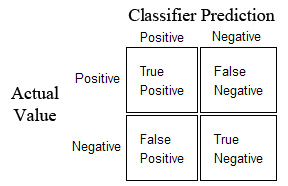

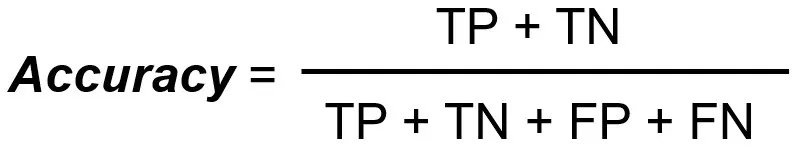

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[  0  30]
 [  0 365]]
Accuracy of the Model: 92.40506329113924%
